In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.utils import normalize
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [20]:
import numpy as np
import math

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
from tensorflow.keras.datasets import cifar10

In [53]:
(x_tr, y_tr), (x_te, y_te) = cifar10.load_data()
x_tr, x_te = x_tr/255.0, x_te/255.0

In [54]:
# x_tr, x_te = normalize(x_tr), normalize(x_te)
help(cifar10)

Help on package tensorflow._api.v1.keras.datasets.cifar10 in tensorflow._api.v1.keras.datasets:

NAME
    tensorflow._api.v1.keras.datasets.cifar10 - CIFAR10 small images classification dataset.

FILE
    /usr/local/lib/python2.7/dist-packages/tensorflow/_api/v1/keras/datasets/cifar10/__init__.py

PACKAGE CONTENTS





In [55]:
class_names = ['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


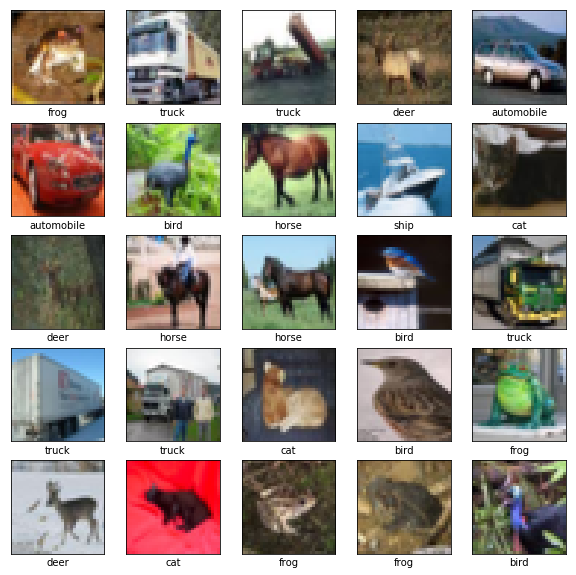

In [56]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_tr[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_tr[i][0]])
plt.show()

In [57]:
x_tr.shape

(50000, 32, 32, 3)

In [58]:
from tensorflow.keras.layers import Dense

In [59]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
history=model.fit(x_tr, y_tr, validation_data=(x_te, y_te), epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.5017 - acc: 0.4546 - val_loss: 1.2733 - val_acc: 0.5421
Epoch 2/10
50000/50000 [==============================] - 67s 1ms/sample - loss: 1.1306 - acc: 0.5980 - val_loss: 1.1138 - val_acc: 0.6076
Epoch 3/10
50000/50000 [==============================] - 67s 1ms/sample - loss: 0.9763 - acc: 0.6578 - val_loss: 0.9854 - val_acc: 0.6520
Epoch 4/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 0.8850 - acc: 0.6890 - val_loss: 0.9991 - val_acc: 0.6549
Epoch 5/10
50000/50000 [==============================] - 67s 1ms/sample - loss: 0.8165 - acc: 0.7151 - val_loss: 0.8878 - val_acc: 0.6896
Epoch 6/10
50000/50000 [==============================] - 67s 1ms/sample - loss: 0.7576 - acc: 0.7347 - val_loss: 0.8697 - val_acc: 0.7041
Epoch 7/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 0.7114 - acc: 0.7505 - val_loss: 0.

In [61]:
val_loss, val_acc = model.evaluate(x_te, y_te, verbose=2)

 - 4s - loss: 0.8748 - acc: 0.7133


In [63]:
history.history

{'acc': [0.45464,
  0.598,
  0.65784,
  0.68898,
  0.71506,
  0.73468,
  0.75054,
  0.76772,
  0.7815,
  0.79596],
 'loss': [1.5016888948822023,
  1.1306106209564208,
  0.9762912901306152,
  0.8850037998008728,
  0.8164851388740539,
  0.757632105922699,
  0.7113562090492248,
  0.6601072487831116,
  0.6205972583293915,
  0.5808588178348542],
 'val_acc': [0.5421,
  0.6076,
  0.652,
  0.6549,
  0.6896,
  0.7041,
  0.7005,
  0.7167,
  0.7117,
  0.7133],
 'val_loss': [1.2733443073272706,
  1.1137953102111817,
  0.9853734679222107,
  0.9990770725250244,
  0.8878461963653564,
  0.8697101774215699,
  0.8694243001937866,
  0.8405078709602356,
  0.8680055714607239,
  0.8748474355220794]}

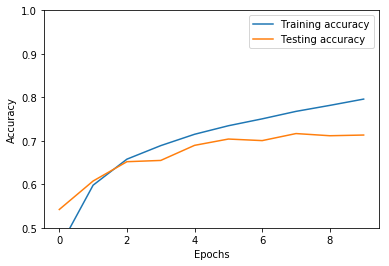

In [65]:
plt.plot(history.history['acc'], label='Training accuracy')
plt.plot(history.history['val_acc'], label='Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend()
plt.show()

In [66]:
early=EarlyStopping(monitor='val_loss', patience=2)
history=model.fit(x_tr, y_tr, validation_data=(x_te, y_te), epochs=10, verbose=0, callbacks=[early])

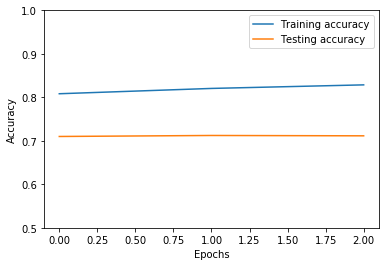

In [68]:
#best loss case
plt.plot(history.history['acc'], label='Training accuracy')
plt.plot(history.history['val_acc'], label='Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend()
plt.show()

In [69]:
#save and load using ckpt files

# ckpt_path = 'training_models/cifar10.ckpt'
# ckp = ModelCheckpoint(filepath=ckpt_path, verbose=1, save_best_only=True, period=3)

# history=model.fit(x_tr, y_tr, validation_data=(x_te, y_te), epochs=10, verbose=0, callbacks=[early, ckp])